# **1. PERKENALAN**

Nama        : Al Izhar Iqrami

Batch       : 011

Phase       : 2

ML          : 1

**ABOUT DATASET**

----

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

# **2. IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

from feature_engine.outliers import Winsorizer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras import Sequential, Model
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score


Melakuakn import library yang berguna untuk membatu memecahkan permasalahan yang diperolah pada saat melakuakan analisis data

# **3. DATA LOADING**

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Copy Dataset

In [3]:
data = df.copy()

## Check Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Ubah Tipe Data

In [5]:
# Megubah tipe data kolom total charger dari object menjadi float
data['TotalCharges'] = data['TotalCharges'].replace(' ',0).astype('float64')

# Mengubah tipe data kolom SeniorCityzen dari integer menjadi object
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

Mengubah tipe data yang dianggap tidak sesuai

## Check Data Duplicate

In [6]:
data.duplicated().sum()

0

Terlihat bahwa tidak terdapat data duplikat

## Check Missing Value

In [7]:
cek = pd.DataFrame(data.isnull().sum(), columns=['No. of missing values'])
cek['% missing_values'] = (cek/len(df)).round(2)*100
cek

,No. of missing values,% missing_values
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


Tidak terdapat missing value pada data yang akan diolah

## Drop Kolom 

In [8]:
data.drop(columns=["customerID"],axis=1,inplace=True)
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


Setelah melihat data secara menyeluruh, saya memutuskan untuk melakukan drop column customerID karena informasi yang disajikan tidak memberikan informasi yang penting.

# **4. Exploratory Data Analysis (EDA)**

## Visualisasi Churn

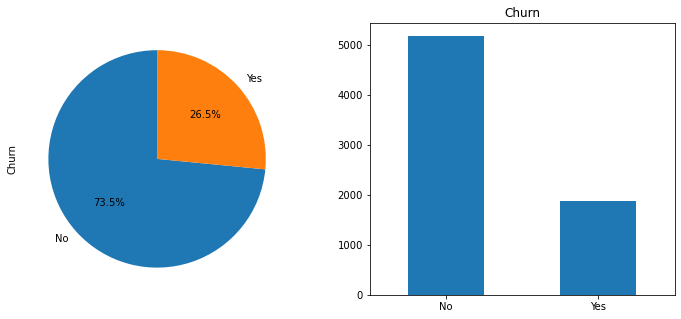

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[0])
data['Churn'].value_counts().plot(kind='bar', ax=axs[1])
plt.title('Churn')
plt.xticks(rotation = 0)
plt.show()

- Terlihat bahwa pada kolom churn memiliki 2 value yaitu Yes dan No. Yes mengindikasikan bahwa pelanggang yang berhenti berlangganan, sedangakan No mengindikasikan bahwa pelanggan yang tidak berhenti berlangganan.
- Persentase Churn dengan label `Yes` sebesar `26.5%` dan untuk label `No` sebesar `73.5%`. Hal ini mengartikan bahwa masih banyak pelanggan yang setia dibandingkan yang berhenti berlangganan.

Terlihat bahwa pada kolom churn untuk label No sebanyak 73.5% dan label Yes 26.5%. Terhitah bahwa data yang dimiliki tidaklah balance, sehingga perlu dilakukan handling imbalance

## Churn vs Gender

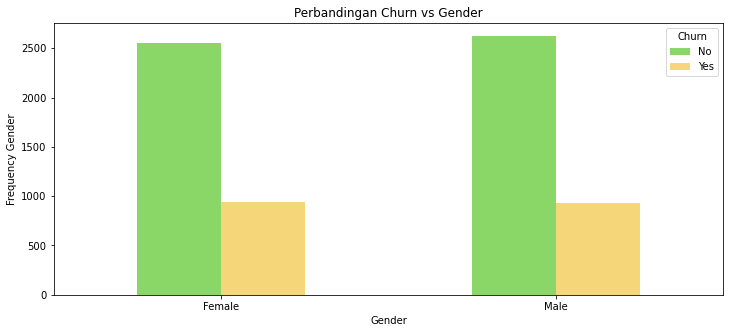

In [10]:
pd.crosstab(data.gender, data.Churn).plot(kind="bar",figsize=(12,5),color=["#8ad767",'#f5d77a'])
plt.title('Perbandingan Churn vs Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency Gender')
plt.xticks(rotation = 0)
plt.show()

Berdasarkan visualisasi diatas terlihat bahwa perbedaan gender tidaklah berpengaruh terhadap churn pelanggan.

## Churn vs Senior Citizen

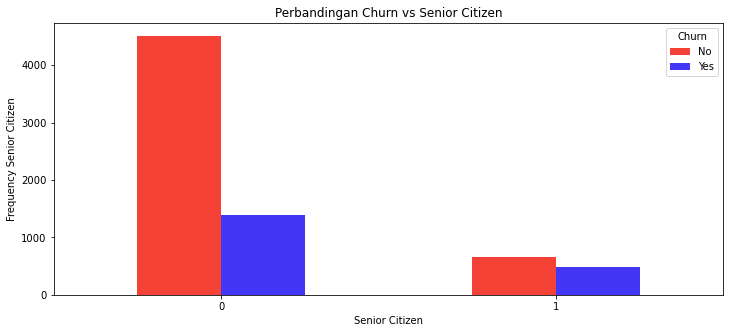

In [11]:
pd.crosstab(data.SeniorCitizen, data.Churn).plot(kind="bar",figsize=(12,5),color=["#f44336",'#4336f4'])
plt.title('Perbandingan Churn vs Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency Senior Citizen')
plt.xticks(rotation = 0)
plt.show()

Terjadinya churn pelanggan berdasarkan kolom SeniorCitizen di dominasil oleh label 0. Hal ini mengindikasikan bahwa kebanyakan pelanggan yang melakukan churn bukan merupakan warga senior.

## Churn vs Partner

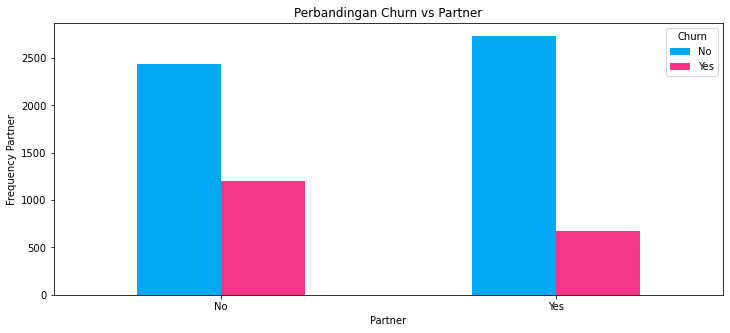

In [12]:
pd.crosstab(data.Partner, data.Churn).plot(kind="bar",figsize=(12,5),color=['#03a9f4','#f43688'])
plt.title('Perbandingan Churn vs Partner')
plt.xlabel('Partner')
plt.ylabel('Frequency Partner')
plt.xticks(rotation = 0)
plt.show()

Berdasarkan visualisasi terlihat bahwa yang bukan partner lebih banyak melakukan churn dibandikang yang merupaka partner. Sehingga dapat dikatakan bahwa Partner mempenagruhi Churn pelanggan

## Churn vs Dependents

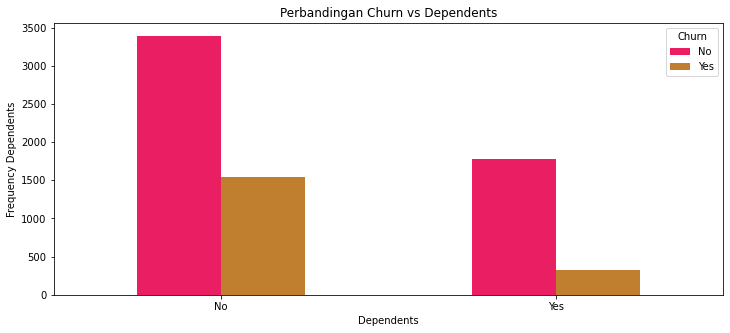

In [13]:
pd.crosstab(data.Dependents, data.Churn).plot(kind="bar",figsize=(12,5),color=['#e91e63','#bf7f2f'])
plt.title('Perbandingan Churn vs Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frequency Dependents')
plt.xticks(rotation = 0)
plt.show()

Terlihat bahwa yang tidak memiliki tanggungan lebih dominan melakukan churn pelanggan dibandingkan dengan yang memiliki tanggungan

## Churn vs Phone Service

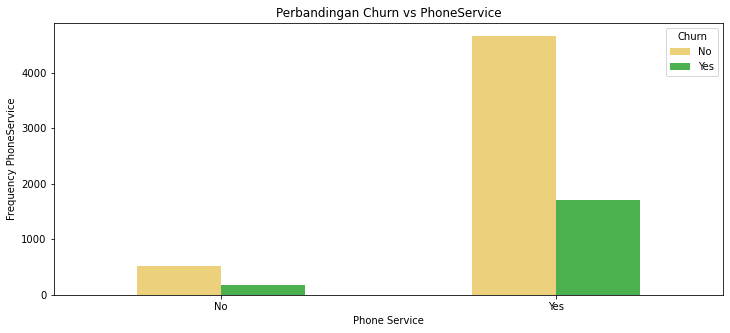

In [14]:
pd.crosstab(data.PhoneService, data.Churn).plot(kind="bar",figsize=(12,5),color=['#ecd07c','#4caf50'])
plt.title('Perbandingan Churn vs PhoneService')
plt.xlabel('Phone Service')
plt.ylabel('Frequency PhoneService')
plt.xticks(rotation = 0)
plt.show()

Phone service dengan label yes lebih cenderung melakukan churn dibandingkan label no

## Churn vs Multiple Lines

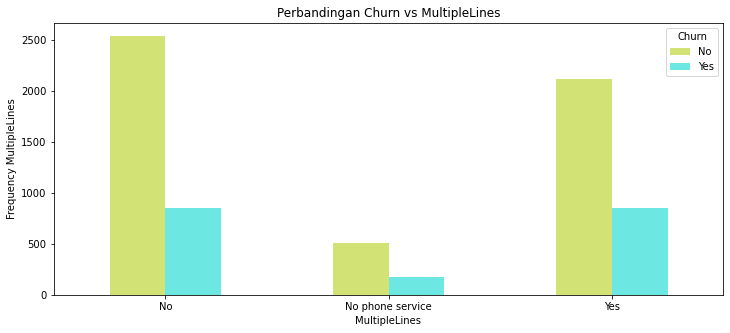

In [15]:
pd.crosstab(data.MultipleLines, data.Churn).plot(kind="bar",figsize=(12,5),color=['#d2e275','#6ce7e2'])
plt.title('Perbandingan Churn vs MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Frequency MultipleLines')
plt.xticks(rotation = 0)
plt.show()

Multiplines dengan label No dan Yes cenderung melakukan churn dibandingkan dengan label lainnya

## Churn vs Internet Service

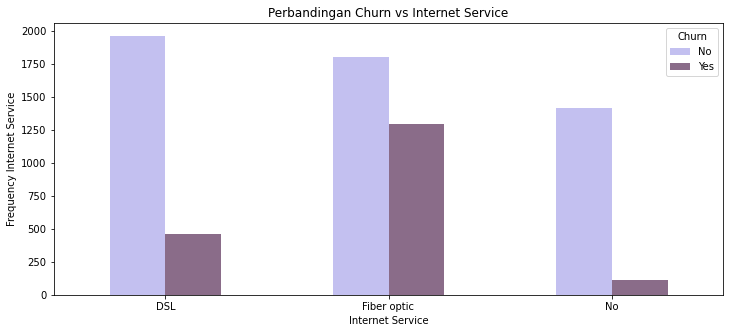

In [16]:
pd.crosstab(data.InternetService, data.Churn).plot(kind="bar",figsize=(12,5),color=['#c3c0f0','#8a6c89'])
plt.title('Perbandingan Churn vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Frequency Internet Service')
plt.xticks(rotation = 0)
plt.show()

Internet sevice dengan label Fiber optic lebih cenderung melakukan churn dibandingkan dengan label lainnya

## Churn vs Online Security

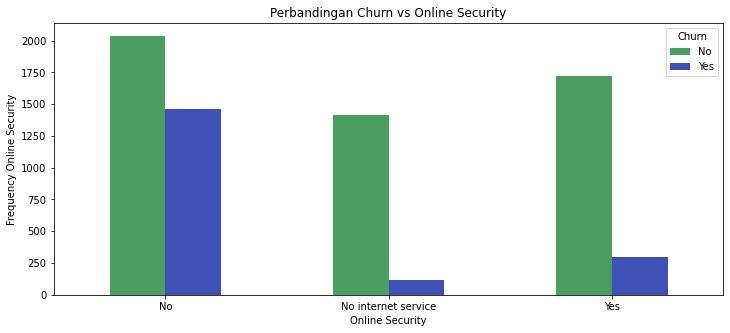

In [17]:
pd.crosstab(data.OnlineSecurity, data.Churn).plot(kind="bar",figsize=(12,5),color=['#4a9f60','#3f51b5'])
plt.title('Perbandingan Churn vs Online Security')
plt.xlabel('Online Security')
plt.ylabel('Frequency Online Security')
plt.xticks(rotation = 0)
plt.show()

Online security dengan lavel No lebih cenderung melakukan churn dibandingkan dengan label lainnya

## Churn vs Online Backup

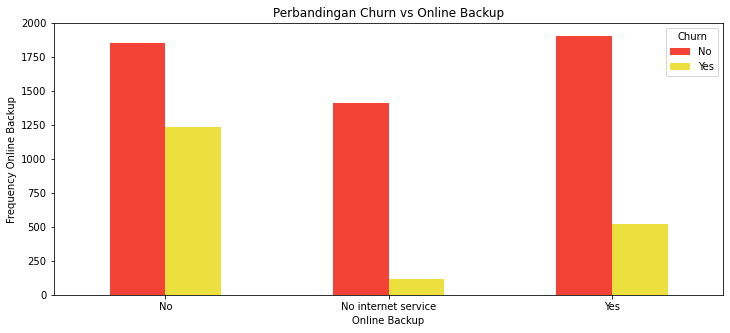

In [18]:
pd.crosstab(data.OnlineBackup, data.Churn).plot(kind="bar",figsize=(12,5),color=["#f44336",'#ece03e'])
plt.title('Perbandingan Churn vs Online Backup')
plt.xlabel('Online Backup')
plt.ylabel('Frequency Online Backup')
plt.xticks(rotation = 0)
plt.show()

Online backup dengan label No lebih cenderung melakukan churn dibandingkan labebl lainnya

## Churn vs Device Protection

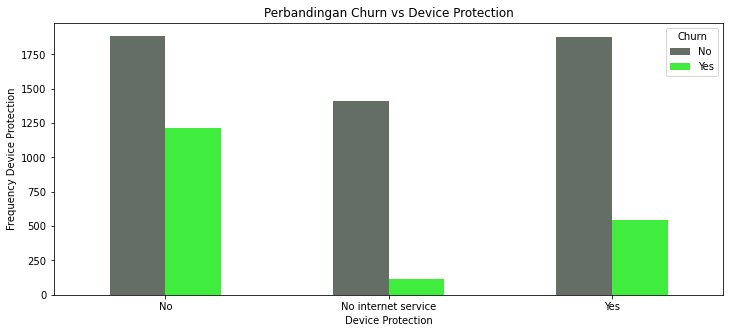

In [19]:
pd.crosstab(data.DeviceProtection, data.Churn).plot(kind="bar",figsize=(12,5),color=['#656e65','#40ec3e'])
plt.title('Perbandingan Churn vs Device Protection')
plt.xlabel('Device Protection')
plt.ylabel('Frequency Device Protection')
plt.xticks(rotation = 0)
plt.show()

Device protection dengan label no lebih cenderung melakukan churn dibandingkan label lainnya

## Churn vs Tech Support

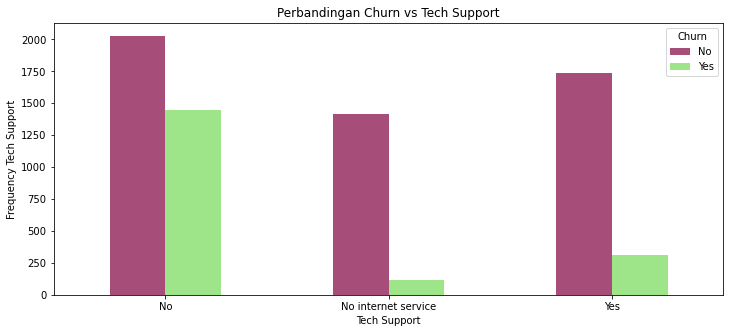

In [20]:
pd.crosstab(data.TechSupport, data.Churn).plot(kind="bar",figsize=(12,5),color=['#a64d79','#9ee489'])
plt.title('Perbandingan Churn vs Tech Support')
plt.xlabel('Tech Support')
plt.ylabel('Frequency Tech Support')
plt.xticks(rotation = 0)
plt.show()

Tech support dengan label No lebih cenderung melakukan churn dibandingkan dengan label lainnya.

## Churn vs Streaming TV

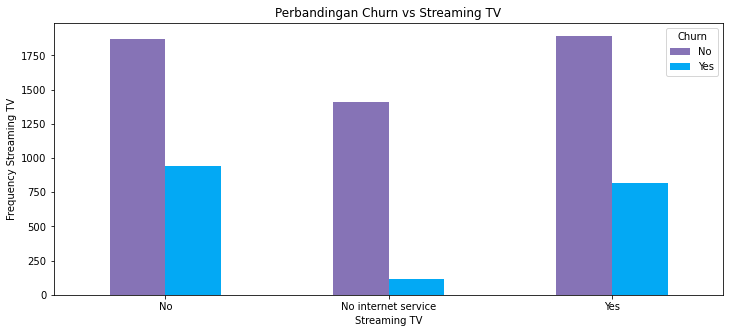

In [21]:
pd.crosstab(data.StreamingTV, data.Churn).plot(kind="bar",figsize=(12,5),color=['#8673b6','#03a9f4'])
plt.title('Perbandingan Churn vs Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Frequency Streaming TV')
plt.xticks(rotation = 0)
plt.show()

Streaming TV dengan label no lebih cenderung melakukan churn pelanggan dibandingkan dengan label lainnya

## Churn vs Streaming Movies

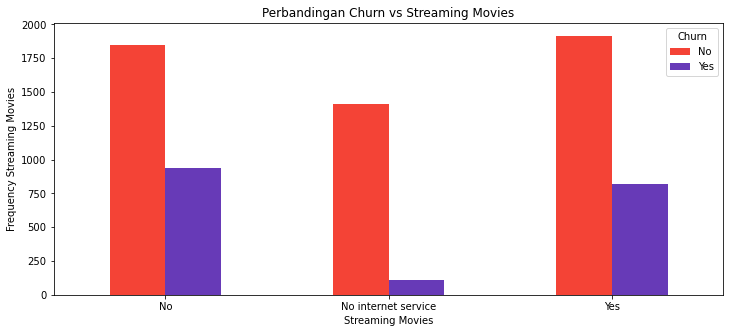

In [22]:
pd.crosstab(data.StreamingMovies, data.Churn).plot(kind="bar",figsize=(12,5),color=["#f44336",'#673ab7'])
plt.title('Perbandingan Churn vs Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Frequency Streaming Movies')
plt.xticks(rotation = 0)
plt.show()

Streaming movies dengan label no lebih cenderung melakukan churn dibandingkan dengan label lainnya.

## Churn vs Contract

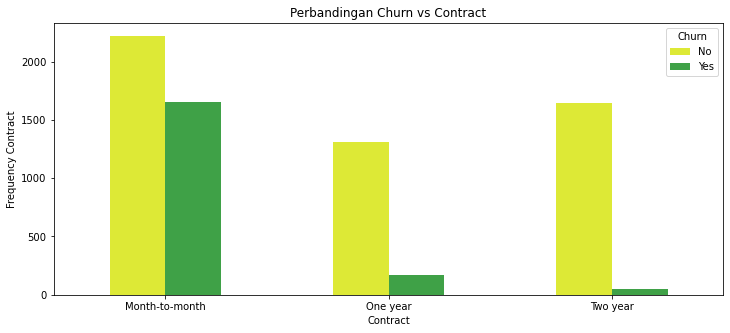

In [23]:
pd.crosstab(data.Contract, data.Churn).plot(kind="bar",figsize=(12,5),color=['#dde936','#3fa147'])
plt.title('Perbandingan Churn vs Contract')
plt.xlabel('Contract')
plt.ylabel('Frequency Contract')
plt.xticks(rotation = 0)
plt.show()

Terjadinya churn pelanggan dengan status kontrak month to month cenderung melakukan churn

## Churn vs Paperless Billling

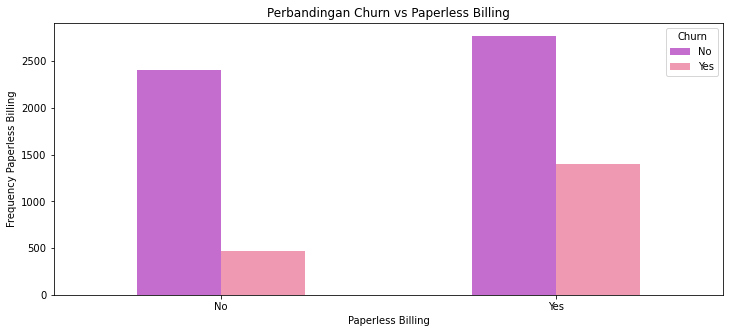

In [24]:
pd.crosstab(data.PaperlessBilling, data.Churn).plot(kind="bar",figsize=(12,5),color=['#c56ccf','#ef99b3'])
plt.title('Perbandingan Churn vs Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Frequency Paperless Billing')
plt.xticks(rotation = 0)
plt.show()

Churn pelaggan dengan label yes cenderung dilakukan oleh tipe pelanggan yang melakukan penagihan dengan kertas.

## Churn vs Payment Method

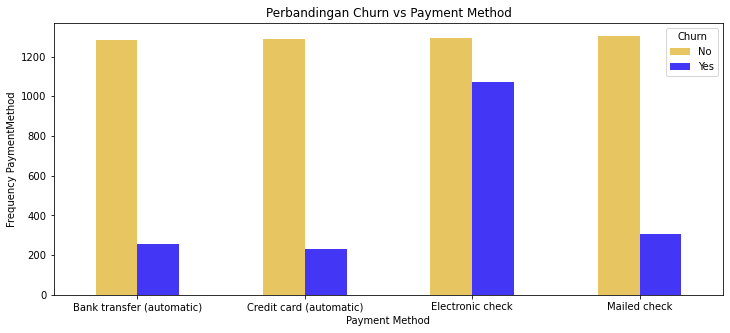

In [25]:
pd.crosstab(data.PaymentMethod, data.Churn).plot(kind="bar",figsize=(12,5),color=['#e7c661','#4336f4'])
plt.title('Perbandingan Churn vs Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency PaymentMethod')
plt.xticks(rotation = 0)
plt.show()

Churn pelanggang dengan label yes dominan dilakukan oleh tipe pelanggan dengan metode pembayaran menggunakan electronic check

# **5. DATA PREPROCESSING**

## Data Inference

In [26]:
data_inf = data.sample(10, random_state=12)

## Pisahkan Data Inference Dari Dataset

In [27]:
data_train_test = data.drop(data_inf.index)

## Reset Index (Optional)

In [28]:
data_inf.reset_index(drop=True, inplace=True)
data_train_test.reset_index(drop=True, inplace=True)

## Split Dataset

**Split Between `Numerical Columns` and `Categorical Columns`**

In [29]:
num = ['tenure','MonthlyCharges','TotalCharges']

cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

**Split `X(features)` and `y(target)`**

In [30]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

**Split `Tain`, `Test` and `Validation`**

In [31]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=30)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=30)

## Handling Outlier

X_train

In [32]:
# Check persentase outlier X_train
num_train = X_train._get_numeric_data() 
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column tenure outliers = 0.00%
Column MonthlyCharges outliers = 0.00%
Column TotalCharges outliers = 0.00%


Setelah melakukan pengecekan data, terllihat bahwa outlier pada columns Senior Cityzen merupakan hal wajar karen anilainya adalah 0 dan 1 yang sesungguhnya merupakan categorik.

X_test

In [33]:
# Check persentase outlier X_test
num_test = X_test._get_numeric_data() 
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column tenure outliers = 0.00%
Column MonthlyCharges outliers = 0.00%
Column TotalCharges outliers = 0.28%


Terlihat bahwa terdapat outliers pada kolom TotalCharger sebesar 0.28%, sehingga kita perlu melakukan handling outlier

In [34]:
# Handling outlier X_test
def find_skewed_boundaries(data, variable, distance):
    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [35]:
# Limits for `TotalChargers`
TotalCharges_upper_limit, TotalCharges_lower_limit = find_skewed_boundaries(X_test, 'TotalCharges', 1.5)
TotalCharges_upper_limit, TotalCharges_lower_limit

print('Total Chargers upper limit : ', TotalCharges_upper_limit)
print('Total Chargers lower limit : ', TotalCharges_lower_limit, '\n')

Total Chargers upper limit :  8415.175
Total Chargers lower limit :  -4411.424999999999 



In [36]:
index_drop_test = X_test.index[X_test['TotalCharges'] > TotalCharges_upper_limit]
index_drop_test.nunique()

4

In [37]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(1405, 19)
(1405,)


Outlier terlah berhasil di handling pada data X_test

X_valid

In [38]:
# Check presentasi outlier
num_val = X_valid._get_numeric_data() 
for k, v in num_val.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_val)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column tenure outliers = 0.00%
Column MonthlyCharges outliers = 0.00%
Column TotalCharges outliers = 0.00%


Terlihat bahwa tidak terdapat outlier pada data X_valid

## Handling Missing Value

In [39]:
# Check Missing Valeu
cek = pd.DataFrame(X_train.isnull().sum(), columns=['Column Missing Value'])
cek['Percentage of Missing Values '] = (cek/len(X_train)).round(2)*100
cek

,Column Missing Value,Percentage of Missing Values
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0


Terlihat bahwa data telah bersih dari adanya missing value, sehingga tidak perlu dilakukan handling

## Feature Enginereing

In [40]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

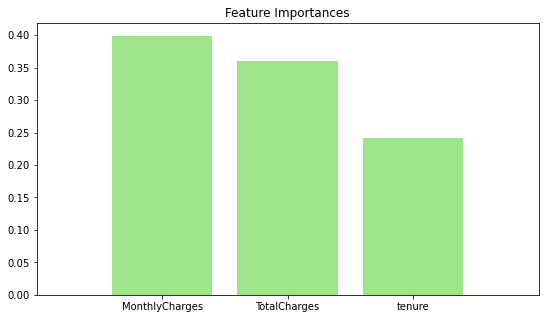

In [41]:
# feature extraction
model_selec = ExtraTreesClassifier(n_estimators=400)
model_selec.fit(X_train[num], y_train)

# feature_importances_ from highest to lowest
sorted_idx = np.argsort(model_selec.feature_importances_)
sorted_idx = sorted_idx[::-1]

# plot fitur penting
plt.figure(figsize=(9,5))
plt.title("Feature Importances")
plt.bar(range(X_train[num].shape[1]), model_selec.feature_importances_[sorted_idx], color="#9ee489")
plt.xticks(range(X_train[num].shape[1]), X_train[num].columns[sorted_idx], rotation=0)
plt.xlim([-1, X_train[num].shape[1]])
plt.show()

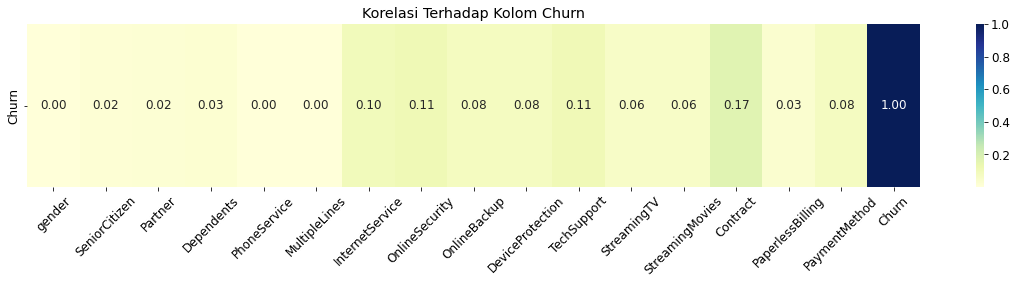

In [42]:
# Melihat korelasi terhadap kolom Churn
target = pd.DataFrame(index=['Churn'],columns=data[cat].columns)
columns = data[cat].columns
for j in range(0,len(columns)):
    u = theil_u(data['Churn'].tolist(),data[columns[j]].tolist())
    target.loc[:,columns[j]] = u
target.fillna(value=np.nan,inplace=True)
plt.rcParams['font.size'] = '12'
plt.figure(figsize=(20,3))
sns.heatmap(target,annot=True,fmt='.2f', cmap = 'YlGnBu')
plt.xticks(rotation=45)
plt.title('Korelasi Terhadap Kolom Churn')
plt.show()

Berdasarkan hasil EDA dan feature importent, maka saya memutuskan untuk memilih kolom berikut sebagai proses analisis lebih lanjut.
- OnlineSecurity
- TechSupport
- Contract
- MonthlyCharges
- TotalCharges

In [43]:
X_train = X_train.loc[:,['tenure','OnlineSecurity','TechSupport','Contract','MonthlyCharges','TotalCharges']]
X_test = X_test.loc[:,['tenure','OnlineSecurity','TechSupport','Contract','MonthlyCharges','TotalCharges']]
X_valid = X_valid.loc[:,['tenure','OnlineSecurity','TechSupport','Contract','MonthlyCharges','TotalCharges']]

In [44]:
np.random.seed(50)
tf.random.set_seed(50)

Setting random seed agar nilai yang diperoleh nanti tidak berubah-ubah

## Feature Encoding

In [45]:
X_train.head()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges
5838,53,Yes,Yes,Month-to-month,71.85,3827.90
3840,64,No internet service,No internet service,Two year,25.65,1740.80
3802,1,No internet service,No internet service,Month-to-month,20.00,20.00
1208,1,No,No,Month-to-month,80.25,80.25
4875,48,Yes,Yes,Month-to-month,117.45,5438.90


In [46]:
#Encoding target
y_train = y_train.map({'Yes' : 1, 'No' : 0})
y_test = y_test.map({'Yes' : 1, 'No' : 0})
y_valid = y_valid.map({'Yes' : 1, 'No' : 0})

In [47]:
# Encoding input

X_train['OnlineSecurity'] = X_train['OnlineSecurity'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_train['TechSupport'] = X_train['TechSupport'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_train['Contract'] = X_train['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

X_test['OnlineSecurity'] = X_test['OnlineSecurity'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_test['TechSupport'] = X_test['TechSupport'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_test['Contract'] = X_test['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

X_valid['OnlineSecurity'] = X_valid['OnlineSecurity'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_valid['TechSupport'] = X_valid['TechSupport'].map({'No': 0, 'No internet service': 1, 'Yes': 2})
X_valid['Contract'] = X_valid['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [48]:
X_train.head()

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges
5838,53,2,2,0,71.85,3827.90
3840,64,1,1,2,25.65,1740.80
3802,1,1,1,0,20.00,20.00
1208,1,0,0,0,80.25,80.25
4875,48,2,2,0,117.45,5438.90


Saya memilih untuk melakukan encoding secara manual agar menghindari ketidak sesuaian nilai imput sehingga dapat mempengaruhi hasil yang ingin dicapai. Saya memilih menghindari menggunakan encoding secara instan karena bisa saja data yang terinput tidak sesuai harapan, misalnya Month-to-month yang seharusnya bernilai 0 tapi terisi 1 atau 2.

## Pipeline Normalizer

In [49]:
X_train = tf.convert_to_tensor(X_train)

In [50]:
X_train

<tf.Tensor: shape=(4225, 6), dtype=float64, numpy=
array([[5.30000e+01, 2.00000e+00, 2.00000e+00, 0.00000e+00, 7.18500e+01,
        3.82790e+03],
       [6.40000e+01, 1.00000e+00, 1.00000e+00, 2.00000e+00, 2.56500e+01,
        1.74080e+03],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+01,
        2.00000e+01],
       ...,
       [1.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.29000e+01,
        1.33745e+03],
       [3.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.05500e+01,
        5.11500e+01],
       [6.70000e+01, 2.00000e+00, 2.00000e+00, 2.00000e+00, 1.04600e+02,
        6.88575e+03]])>

In [51]:
normalisasi = tf.keras.layers.Normalization(axis=-1)
normalisasi.adapt(X_train)

## Handling Imbalance

In [52]:
X_train = X_train.numpy()

In [53]:
smotec = SMOTE(random_state=30)
X_train, y_train = smotec.fit_resample(X_train, y_train.ravel())

In [54]:
print(f'y_train setelah handling imbalance : {sum(y_train==1)}')
print(f'X_train setelah handling imbalance : {sum(y_train==0)}')

y_train setelah handling imbalance : 3099
X_train setelah handling imbalance : 3099


Terlihat bahwa vitur telah balance

## Pipeline

In [55]:
# Input pipeline
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid,y_valid))

SyntaxError: invalid syntax (Temp/ipykernel_10988/338344401.py, line 2)

In [ ]:
train_dataset = train_dataset.prefetch(buffer_size=6198).batch(64)      # buffer_size --> penyimpanan memori ; Prefetch --> merekan informasi 
test_dataset = test_dataset.prefetch(buffer_size=6198).batch(64)        
valid_dataset = valid_dataset.prefetch(buffer_size=6198).batch(64)

# **6. MODEL DEFINITION**

Sebelum melakukan model definition, saya telah melakukan pengecekan terhadap jumlah hidden layer berapa yang baik untuk digunakan. Adapun hasil yang diperoleh ialah berjumlah 4 hidden layer. Dengan demikian untuk pendefinisian model Sequential dan Functional saya menggunakan 4 hidden layer

## Sequential API

In [ ]:
model_seq = tf.keras.Sequential([Input(shape=(6,)),normalisasi,
          Dense(17, activation='relu'),
          Dense(13, activation='relu'),
          Dense(9, activation='relu'),                 
          Dense(5, activation='relu'),
          Dense(1, activation='sigmoid')])

## Functional API

In [ ]:
layer1 = Input(shape=(6,))
layer2 = Dense(17, activation='relu')(layer1)
layer3 = Dense(13, activation='relu')(layer2)
layer4 = Dense(9, activation='relu')(layer3)                
layer5 = Dense(5, activation='relu')(layer4)
output = Dense(1, activation='sigmoid')(layer5)
func_model = Model(inputs = layer1, outputs = output)

# **7. MODEL TRAINING**

## Sequential API

Epoch 1/50
97/97 [==============================] - 1s 2ms/step - loss: 0.6483 - accuracy: 0.7102 - val_loss: 0.7647 - val_accuracy: 0.4173
Epoch 2/50
97/97 [==============================] - 0s 1ms/step - loss: 0.6329 - accuracy: 0.6778 - val_loss: 0.7370 - val_accuracy: 0.6253
Epoch 3/50
97/97 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.7230 - val_loss: 0.7367 - val_accuracy: 0.6749
Epoch 4/50
97/97 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.7367 - val_loss: 0.7270 - val_accuracy: 0.7019
Epoch 5/50
97/97 [==============================] - 0s 1ms/step - loss: 0.6028 - accuracy: 0.7480 - val_loss: 0.7203 - val_accuracy: 0.7140
Epoch 6/50
97/97 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.7512 - val_loss: 0.7182 - val_accuracy: 0.7317
Epoch 7/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.7590 - val_loss: 0.7088 - val_accuracy: 0.7417
Epoch 8/50
97/97 [==

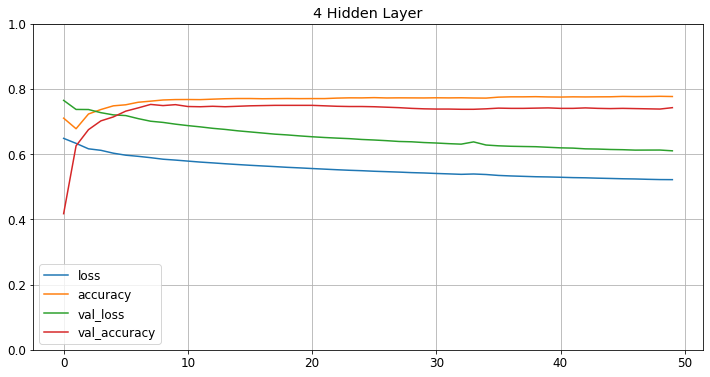

In [ ]:
model_seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_model_seq = model_seq.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_model_seq.history).plot(figsize=(12, 6))
plt.gca().set_ylim(0, 1)
plt.title('4 Hidden Layer')
plt.grid(True)
plt.show()

## Functional API

Epoch 1/50
97/97 [==============================] - 1s 3ms/step - loss: 3.7379 - accuracy: 0.5507 - val_loss: 14.7251 - val_accuracy: 0.2619
Epoch 2/50
97/97 [==============================] - 0s 1ms/step - loss: 1.1016 - accuracy: 0.5499 - val_loss: 0.6737 - val_accuracy: 0.7587
Epoch 3/50
97/97 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.5794 - val_loss: 0.6732 - val_accuracy: 0.7615
Epoch 4/50
97/97 [==============================] - 0s 1ms/step - loss: 0.6591 - accuracy: 0.5944 - val_loss: 0.6749 - val_accuracy: 0.7615
Epoch 5/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5965 - val_loss: 0.6765 - val_accuracy: 0.7622
Epoch 6/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.5973 - val_loss: 0.6769 - val_accuracy: 0.7637
Epoch 7/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6004 - val_loss: 0.6769 - val_accuracy: 0.7637
Epoch 8/50
97/97 [=

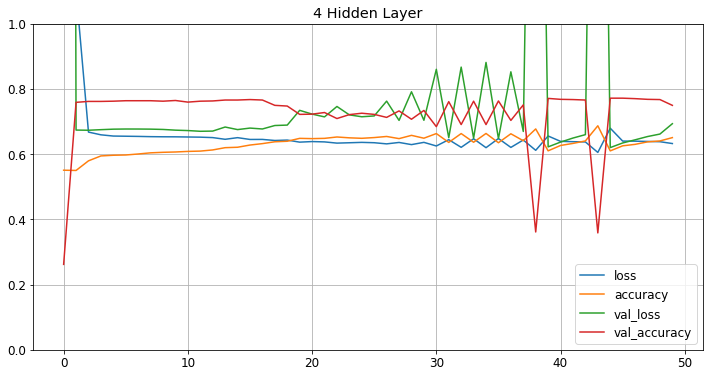

In [ ]:
func_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_model_func = func_model.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_model_func.history).plot(figsize=(12, 6))
plt.gca().set_ylim(0, 1)
plt.title('4 Hidden Layer')
plt.grid(True)
plt.show()

## Analisis Model

Berdasarkan grafik yang diberikan, dapat dilihat bahwa model terbaik dalam kasus ini ialah Sequential API. Adapaun untuk model improvemet maka saya akan menggunakan functional API

# **7. MODEL IMPROVEMENT**

Saya tertarik ingin melakukan improvement model dengan membandingkan tiap fungsi aktivasi. Namun dalam project ini saya akan berfokus pada model `Relu`, `Elu` dan `Leaky Relu` serta melakukan perbandingan antara kernel initializer menggunakan  `glorot uniform` dan `glorot normal` dari masing-masing model. Kemudian melakukan evaluasi model mana yang dianggap paling terbaik. Adapun optimizer yang saya gunakan ialah `Adam`

## **Kernel Glorot Uniform**

----

## Relu

In [ ]:
model_relu_uniform = keras.models.Sequential()
model_relu_uniform.add(Input(shape=(6,)))
model_relu_uniform.add(normalisasi)
model_relu_uniform.add(Dense(17, activation='relu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_relu_uniform.add(Dropout(rate=0.2))

model_relu_uniform.add(Dense(13, activation='relu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_relu_uniform.add(Dropout(rate=0.2))

model_relu_uniform.add(Dense(9, activation='relu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_relu_uniform.add(Dropout(rate=0.2))

model_relu_uniform.add(Dense(5, activation='relu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_relu_uniform.add(Dropout(rate=0.2))
model_relu_uniform.add(Dense(1, activation='sigmoid'))

Epoch 1/50
97/97 [==============================] - 1s 3ms/step - loss: 0.6781 - accuracy: 0.5247 - val_loss: 0.5899 - val_accuracy: 0.7388
Epoch 2/50
97/97 [==============================] - 0s 3ms/step - loss: 0.6274 - accuracy: 0.6186 - val_loss: 0.5495 - val_accuracy: 0.7218
Epoch 3/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5906 - accuracy: 0.6646 - val_loss: 0.5278 - val_accuracy: 0.6984
Epoch 4/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.6555 - val_loss: 0.5288 - val_accuracy: 0.7005
Epoch 5/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.6786 - val_loss: 0.5212 - val_accuracy: 0.7161
Epoch 6/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.6704 - val_loss: 0.5160 - val_accuracy: 0.7246
Epoch 7/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.6862 - val_loss: 0.5192 - val_accuracy: 0.7268
Epoch 8/50
97/97 [==

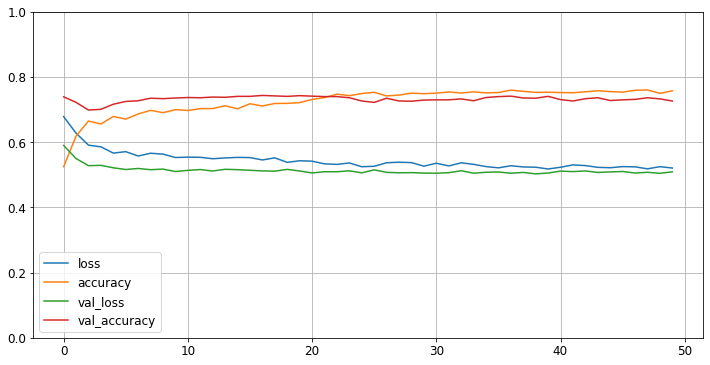

In [ ]:
model_relu_uniform.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_relu_uniform = model_relu_uniform.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_relu_uniform.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Elu

In [ ]:
model_elu_uniform = keras.models.Sequential()
model_elu_uniform.add(Input(shape=(6,)))
model_elu_uniform.add(normalisasi)
model_elu_uniform.add(Dense(17, activation='elu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_elu_uniform.add(Dropout(rate=0.2))

model_elu_uniform.add(Dense(13, activation='elu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_elu_uniform.add(Dropout(rate=0.2))

model_elu_uniform.add(Dense(9, activation='elu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_elu_uniform.add(Dropout(rate=0.2))

model_elu_uniform.add(Dense(5, activation='elu', kernel_initializer= 'glorot_uniform', use_bias=False))
model_elu_uniform.add(Dropout(rate=0.2))
model_elu_uniform.add(Dense(1, activation='sigmoid'))

Epoch 1/50
97/97 [==============================] - 1s 4ms/step - loss: 0.6057 - accuracy: 0.6702 - val_loss: 0.5785 - val_accuracy: 0.6820
Epoch 2/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7307 - val_loss: 0.5684 - val_accuracy: 0.7055
Epoch 3/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.7380 - val_loss: 0.5588 - val_accuracy: 0.7083
Epoch 4/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7341 - val_loss: 0.5515 - val_accuracy: 0.7076
Epoch 5/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.7394 - val_loss: 0.5430 - val_accuracy: 0.7076
Epoch 6/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7451 - val_loss: 0.5426 - val_accuracy: 0.7055
Epoch 7/50
97/97 [==============================] - 0s 4ms/step - loss: 0.5280 - accuracy: 0.7498 - val_loss: 0.5402 - val_accuracy: 0.7083
Epoch 8/50
97/97 [==

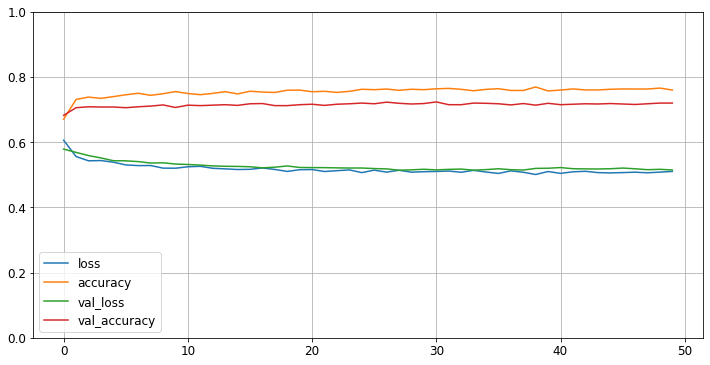

In [ ]:
model_elu_uniform.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_elu_uniform = model_elu_uniform.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_elu_uniform.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Leaky Relu

In [ ]:
model_leakrelu_uniform = keras.models.Sequential()
model_leakrelu_uniform.add(Input(shape=(6,)))
model_leakrelu_uniform.add(normalisasi)
model_leakrelu_uniform.add(Dense(17, activation='LeakyReLU', kernel_initializer= 'glorot_uniform', use_bias=False))
model_leakrelu_uniform.add(Dropout(rate=0.2))

model_leakrelu_uniform.add(Dense(13, activation='LeakyReLU', kernel_initializer= 'glorot_uniform', use_bias=False))
model_leakrelu_uniform.add(Dropout(rate=0.2))

model_leakrelu_uniform.add(Dense(9, activation='LeakyReLU', kernel_initializer= 'glorot_uniform', use_bias=False))
model_leakrelu_uniform.add(Dropout(rate=0.2))

model_leakrelu_uniform.add(Dense(5, activation='LeakyReLU', kernel_initializer= 'glorot_uniform', use_bias=False))
model_leakrelu_uniform.add(Dropout(rate=0.2))
model_leakrelu_uniform.add(Dense(1, activation='sigmoid'))

Epoch 1/50
97/97 [==============================] - 1s 4ms/step - loss: 0.6963 - accuracy: 0.5440 - val_loss: 0.6382 - val_accuracy: 0.7424
Epoch 2/50
97/97 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.6905 - val_loss: 0.6036 - val_accuracy: 0.7154
Epoch 3/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7173 - val_loss: 0.5516 - val_accuracy: 0.7182
Epoch 4/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.7341 - val_loss: 0.5334 - val_accuracy: 0.7168
Epoch 5/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7444 - val_loss: 0.5273 - val_accuracy: 0.7154
Epoch 6/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7519 - val_loss: 0.5228 - val_accuracy: 0.7140
Epoch 7/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7459 - val_loss: 0.5181 - val_accuracy: 0.7111
Epoch 8/50
97/97 [==

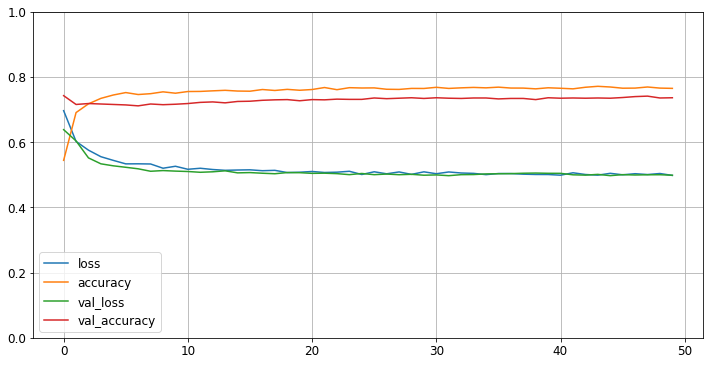

In [ ]:
model_leakrelu_uniform.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_leakrelu = model_leakrelu_uniform.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_leakrelu.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## **Kernel Glorot Normal**

----

## Relu

In [ ]:
model_relu_normal = keras.models.Sequential()
model_relu_normal.add(Input(shape=(6,)))
model_relu_normal.add(normalisasi)
model_relu_normal.add(Dense(17, activation='relu', kernel_initializer= 'glorot_normal', use_bias=False))
model_relu_normal.add(Dropout(rate=0.2))

model_relu_normal.add(Dense(13, activation='relu', kernel_initializer= 'glorot_normal', use_bias=False))
model_relu_normal.add(Dropout(rate=0.2))

model_relu_normal.add(Dense(9, activation='relu', kernel_initializer= 'glorot_normal', use_bias=False))
model_relu_normal.add(Dropout(rate=0.2))

model_relu_normal.add(Dense(5, activation='relu', kernel_initializer= 'glorot_normal', use_bias=False))
model_relu_normal.add(Dropout(rate=0.2))
model_relu_normal.add(Dense(1, activation='sigmoid'))

Epoch 1/50
97/97 [==============================] - 1s 4ms/step - loss: 0.6740 - accuracy: 0.5494 - val_loss: 0.6148 - val_accuracy: 0.7019
Epoch 2/50
97/97 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6016 - val_loss: 0.5678 - val_accuracy: 0.7154
Epoch 3/50
97/97 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6383 - val_loss: 0.5413 - val_accuracy: 0.7218
Epoch 4/50
97/97 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6551 - val_loss: 0.5372 - val_accuracy: 0.7239
Epoch 5/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.6868 - val_loss: 0.5222 - val_accuracy: 0.7239
Epoch 6/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.6912 - val_loss: 0.5245 - val_accuracy: 0.7189
Epoch 7/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.7022 - val_loss: 0.5244 - val_accuracy: 0.7339
Epoch 8/50
97/97 [==

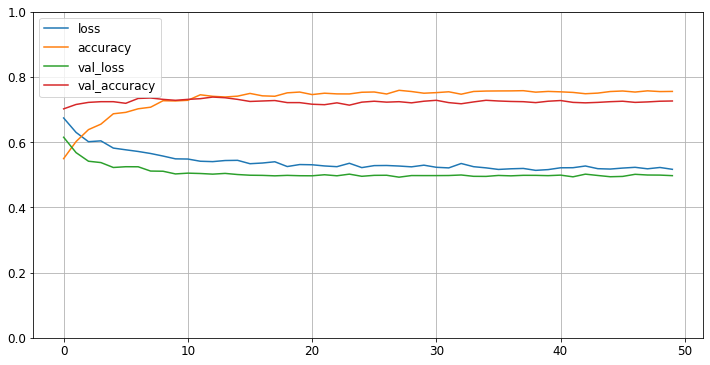

In [ ]:
model_relu_normal.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_relu_normal = model_relu_normal.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_relu_normal.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Elu

In [ ]:
model_elu_normal = keras.models.Sequential()
model_elu_normal.add(Input(shape=(6,)))
model_elu_normal.add(normalisasi)
model_elu_normal.add(Dense(17, activation='elu', kernel_initializer= 'glorot_normal', use_bias=False))
model_elu_normal.add(Dropout(rate=0.2))

model_elu_normal.add(Dense(13, activation='elu', kernel_initializer= 'glorot_normal', use_bias=False))
model_elu_normal.add(Dropout(rate=0.2))

model_elu_normal.add(Dense(9, activation='elu', kernel_initializer= 'glorot_normal', use_bias=False))
model_elu_normal.add(Dropout(rate=0.2))

model_elu_normal.add(Dense(5, activation='elu', kernel_initializer= 'glorot_normal', use_bias=False))
model_elu_normal.add(Dropout(rate=0.2))
model_elu_normal.add(Dense(1, activation='sigmoid'))

Epoch 1/50
97/97 [==============================] - 1s 4ms/step - loss: 0.6076 - accuracy: 0.6765 - val_loss: 0.6101 - val_accuracy: 0.7048
Epoch 2/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7365 - val_loss: 0.5757 - val_accuracy: 0.7012
Epoch 3/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7457 - val_loss: 0.5600 - val_accuracy: 0.7069
Epoch 4/50
97/97 [==============================] - 0s 4ms/step - loss: 0.5383 - accuracy: 0.7443 - val_loss: 0.5533 - val_accuracy: 0.7019
Epoch 5/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5381 - accuracy: 0.7407 - val_loss: 0.5454 - val_accuracy: 0.7076
Epoch 6/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7412 - val_loss: 0.5446 - val_accuracy: 0.7055
Epoch 7/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7519 - val_loss: 0.5409 - val_accuracy: 0.7076
Epoch 8/50
97/97 [==

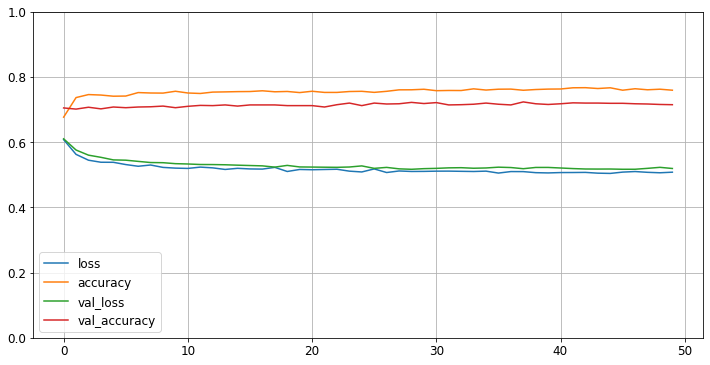

In [ ]:
model_elu_normal.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_elu_normal = model_elu_normal.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_elu_normal.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Leaky Relu

In [ ]:
model_leakyrelu_normal = keras.models.Sequential()
model_leakyrelu_normal.add(Input(shape=(6,)))
model_leakyrelu_normal.add(normalisasi)
model_leakyrelu_normal.add(Dense(17, activation='LeakyReLU', kernel_initializer= 'glorot_normal', use_bias=False))
model_leakyrelu_normal.add(Dropout(rate=0.2))

model_leakyrelu_normal.add(Dense(13, activation='LeakyReLU', kernel_initializer= 'glorot_normal', use_bias=False))
model_leakyrelu_normal.add(Dropout(rate=0.2))

model_leakyrelu_normal.add(Dense(9, activation='LeakyReLU', kernel_initializer= 'glorot_normal', use_bias=False))
model_leakyrelu_normal.add(Dropout(rate=0.2))

model_leakyrelu_normal.add(Dense(5, activation='LeakyReLU', kernel_initializer= 'glorot_normal', use_bias=False))
model_leakyrelu_normal.add(Dropout(rate=0.2))
model_leakyrelu_normal.add(Dense(1, activation='sigmoid'))

Epoch 1/50
97/97 [==============================] - 1s 4ms/step - loss: 0.6985 - accuracy: 0.5042 - val_loss: 0.5807 - val_accuracy: 0.7324
Epoch 2/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7310 - val_loss: 0.5415 - val_accuracy: 0.6977
Epoch 3/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7427 - val_loss: 0.5338 - val_accuracy: 0.7147
Epoch 4/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7446 - val_loss: 0.5175 - val_accuracy: 0.7119
Epoch 5/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7470 - val_loss: 0.5141 - val_accuracy: 0.7154
Epoch 6/50
97/97 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7515 - val_loss: 0.5120 - val_accuracy: 0.7197
Epoch 7/50
97/97 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7531 - val_loss: 0.5118 - val_accuracy: 0.7218
Epoch 8/50
97/97 [==

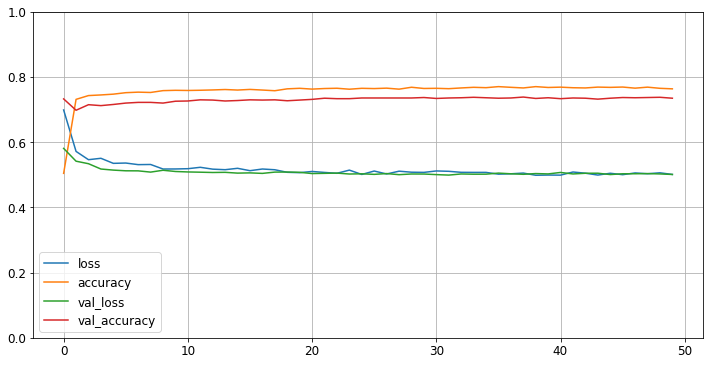

In [ ]:
model_leakyrelu_normal.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(clipvalue=1.0), metrics=['accuracy'])

history_leakyrelu_normal = model_leakyrelu_normal.fit(train_dataset, epochs=50, validation_data=valid_dataset)

pd.DataFrame(history_leakyrelu_normal.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **8. MODEL EVALUATION**

## **Kernel Glorot Uniform**

----

## Relu

In [ ]:
model_relu_uniform.evaluate(test_dataset)
y1 = model_relu_uniform.predict(X_test)
y_predic = []
for k in y1:
    if k>0.5:
        y_predic.append(1)
    else:
        y_predic.append(0)

44/44 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1031
           1       0.48      0.82      0.60       374

    accuracy                           0.71      1405
   macro avg       0.69      0.75      0.69      1405
weighted avg       0.80      0.71      0.73      1405



In [ ]:
print(roc_auc_score(y_test, y_predic))

0.7468762480743995


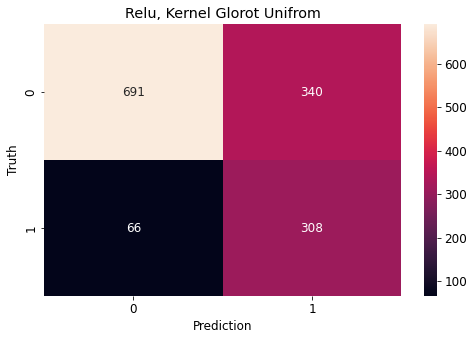

In [ ]:
# Confussion Matrix
relu_unifrom = confusion_matrix(y_test,y_predic)
plt.figure(figsize=(8,5))
sns.heatmap(relu_unifrom,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Relu, Kernel Glorot Unifrom')
plt.show()

Berdasarakan ilustrasi dari confussion matrix, maka diperoleh informasi berikut :
- Label 0 berhasil terprediksi benar sebanyak 691 dan terprediksi salah sebanyak 340
- Label 1 berhasil terprediksi benar sebanyak 308 dan terprediksi salah sebanyak 66

Dimana 1 adalah Yes dan 0 dalah No

## Elu

In [ ]:
model_elu_uniform.evaluate(test_dataset)
y1 = model_elu_uniform.predict(X_test)
y_predic = []
for k in y1:
    if k>0.5:
        y_predic.append(1)
    else:
        y_predic.append(0)

44/44 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1031
           1       0.46      0.84      0.60       374

    accuracy                           0.70      1405
   macro avg       0.69      0.75      0.68      1405
weighted avg       0.80      0.70      0.72      1405



In [ ]:
print(roc_auc_score(y_test, y_predic))

0.7459322499831429


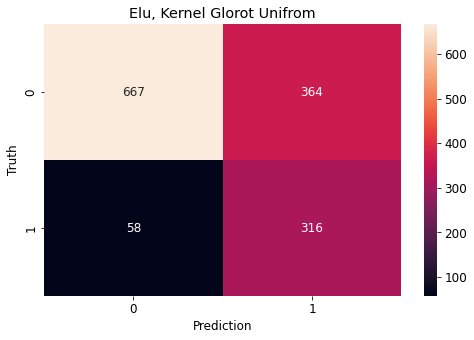

In [ ]:
# Confussion Matrix
elu_uniform = confusion_matrix(y_test,y_predic)
plt.figure(figsize=(8,5))
sns.heatmap(elu_uniform,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Elu, Kernel Glorot Unifrom')
plt.show()

Berdasarakan ilustrasi dari confussion matrix, maka diperoleh informasi berikut :
- Label 0 berhasil terprediksi benar sebanyak 667 dan terprediksi salah sebanyak 364
- Label 1 berhasil terprediksi benar sebanyak 316 dan terprediksi salah sebanyak 58

Dimana 1 adalah Yes dan 0 dalah No

## Leaky Relu

In [ ]:
model_leakrelu_uniform.evaluate(test_dataset)
y1 = model_leakrelu_uniform.predict(X_test)
y_predic = []
for k in y1:
    if k>0.5:
        y_predic.append(1)
    else:
        y_predic.append(0)


44/44 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1031
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1405
   macro avg       0.69      0.75      0.69      1405
weighted avg       0.79      0.72      0.73      1405



In [ ]:
print(roc_auc_score(y_test, y_predic))

0.74624734824712


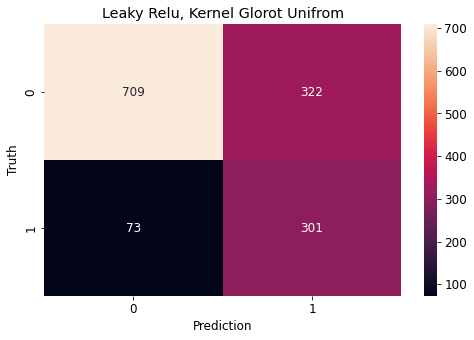

In [ ]:
# Confussion Matrix
leakyelu_uniform = confusion_matrix(y_test,y_predic)
plt.figure(figsize=(8,5))
sns.heatmap(leakyelu_uniform,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Leaky Relu, Kernel Glorot Unifrom')
plt.show()

Berdasarakan ilustrasi dari confussion matrix, maka diperoleh informasi berikut :
- Label 0 berhasil terprediksi benar sebanyak 709 dan terprediksi salah sebanyak 322
- Label 1 berhasil terprediksi benar sebanyak 301 dan terprediksi salah sebanyak 73

Dimana 1 adalah Yes dan 0 dalah No

## **Kernel Glorot Normal**

----

## Relu

In [ ]:
model_relu_normal.evaluate(test_dataset)
y1 = model_relu_normal.predict(X_test)
y_predic = []
for k in y1:
    if k>0.5:
        y_predic.append(1)
    else:
        y_predic.append(0)

44/44 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1031
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1405
   macro avg       0.69      0.74      0.69      1405
weighted avg       0.79      0.72      0.73      1405



In [ ]:
print(roc_auc_score(y_test, y_predic))

0.7445434835604288


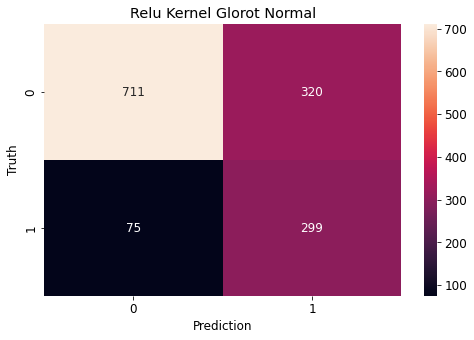

In [ ]:
# Confussion Matrix
relu_normal = confusion_matrix(y_test,y_predic)
plt.figure(figsize=(8,5))
sns.heatmap(relu_normal,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Relu Kernel Glorot Normal')
plt.show()

Berdasarakan ilustrasi dari confussion matrix, diperoleh informasi berikut :
- Label 0 berhasil terprediksi benar sebanyak 711 dan terprediksi salah sebanyak 320
- Label 1 berhasil terprediksi benar sebanyak 299 dan terprediksi salah sebanyak 75

Dimana 1 adalah Yes dan 0 dalah No

## Elu

In [ ]:
model_elu_normal.evaluate(test_dataset)
y1 = model_elu_normal.predict(X_test)
y_predic = []
for k in y1:
    if k>0.5:
        y_predic.append(1)
    else:
        y_predic.append(0)

44/44 [==============================] - 0s 679us/step


In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.92      0.64      0.76      1031
           1       0.46      0.84      0.60       374

    accuracy                           0.70      1405
   macro avg       0.69      0.74      0.68      1405
weighted avg       0.80      0.70      0.71      1405



In [ ]:
print(roc_auc_score(y_test, y_predic))

0.7421705213255393


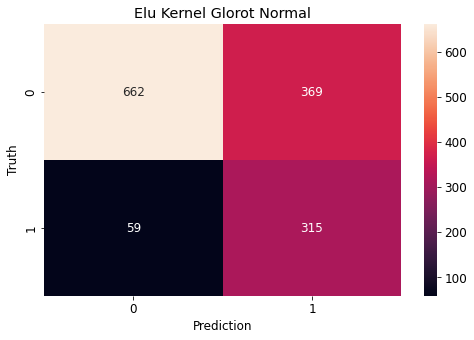

In [ ]:
# Confussion Matrix
elu_normal = confusion_matrix(y_test,y_predic)
plt.figure(figsize=(8,5))
sns.heatmap(elu_normal,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Elu Kernel Glorot Normal')
plt.show()

Berdasarakan ilustrasi dari confussion matrix, diperoleh informasi berikut :
- Label 0 berhasil terprediksi benar sebanyak 662 dan terprediksi salah sebanyak 369
- Label 1 berhasil terprediksi benar sebanyak 315 dan terprediksi salah sebanyak 59

Dimana 1 adalah Yes dan 0 dalah No

## Leaky Relu

In [ ]:
model_leakyrelu_normal.evaluate(test_dataset)
y1 = model_leakyrelu_normal.predict(X_test)
y_predic = []
for k in y1:
    if k>0.5:
        y_predic.append(1)
    else:
        y_predic.append(0)

44/44 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1031
           1       0.48      0.79      0.60       374

    accuracy                           0.72      1405
   macro avg       0.69      0.74      0.69      1405
weighted avg       0.79      0.72      0.73      1405



In [ ]:
print(roc_auc_score(y_test, y_predic))

0.7397988557913244


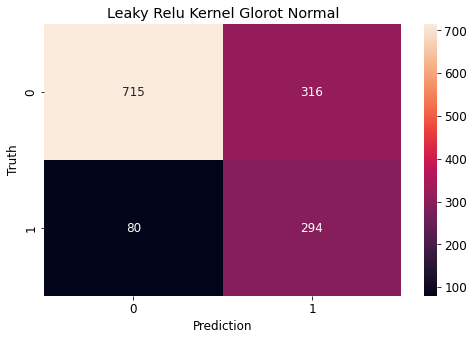

In [ ]:
# Confussion Matrix
model_leakyrelu_normal = confusion_matrix(y_test,y_predic)
plt.figure(figsize=(8,5))
sns.heatmap(model_leakyrelu_normal,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Leaky Relu Kernel Glorot Normal')
plt.show()

Berdasarakan ilustrasi dari confussion matrix, diperoleh informasi berikut :
- Label 0 berhasil terprediksi benar sebanyak 715 dan terprediksi salah sebanyak 316
- Label 1 berhasil terprediksi benar sebanyak 294 dan terprediksi salah sebanyak 80

Dimana 1 adalah Yes dan 0 dalah No

## Analisis Model Terbaik

Berdasarkan informasi diberikan diatas, terlihat hasil prediksi label 0 paling banyak benar ialah `Leaky Relu menggunakan Glorot Normal`, sedangkan yang memprediksi label 1 paling panyak benar ialah `Elu menggunakan Glorot Uniform`. Berdasarkan kasus yang diberikan terkait Churn Pelanggan maka saya memilih model yang paling banyak memprediksi 1 dengan alasan bahwa saya lebih ingin mempertahankan pelanggan dibandingkan memperdulikan pelanggan yang tidak setia. Sehingga saya akan memakai model `Elu menggunakan Glorot Uniform` untuk proses deployment.

**MODEL SAVING**

In [ ]:
model_elu_uniform.save('Model_Terbaik.h5')

# **10. MODEL INFERENCE**

**LOAD MODEL**

In [ ]:
model_elu = tf.keras.models.load_model('Model_Terbaik.h5')
model_elu.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense_15 (Dense)            (None, 17)                102       
                                                                 
 dropout_4 (Dropout)         (None, 17)                0         
                                                                 
 dense_16 (Dense)            (None, 13)                221       
                                                                 
 dropout_5 (Dropout)         (None, 13)                0         
                                                                 
 dense_17 (Dense)            (None, 9)                 117       
                                                      

In [ ]:
new_data = {'tenure':53, 'OnlineSecurity': 2, 'TechSupport': 2, 'Contract': 0, 'MonthlyCharges' : 71.85, 'TotalCharges':3827.90}

data2 = pd.DataFrame(new_data, index = ['Pelanggan'])
data2

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges
Pelanggan,53,2,2,0,71.85,3827.9


In [ ]:
prediksi = tf.convert_to_tensor(data2)

In [ ]:
prediksi

<tf.Tensor: shape=(1, 6), dtype=float64, numpy=
array([[5.3000e+01, 2.0000e+00, 2.0000e+00, 0.0000e+00, 7.1850e+01,
        3.8279e+03]])>

In [ ]:
Hasil_prediksi = model_elu.predict(prediksi)

1/1 [==============================] - 0s 73ms/step


In [ ]:
if int(Hasil_prediksi > 0.5) :
    print('Pelanggan akan melakukan churn')
else :
    print('Pelanggan tidak melakukan churn')

Pelanggan tidak melakukan churn


----

In [ ]:
data_inf.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,1,Yes,Yes,22,No,No phone service,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Mailed check,40.05,880.2,Yes
1,Male,0,No,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.5,Yes
2,Male,0,Yes,Yes,31,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,54.35,1647.0,No


In [ ]:
data1 = data_inf.drop(data_inf.columns[[0,1,2,3,5,6,7,9,10,12,13,15,16,19]], axis=1)

In [ ]:
data1

,tenure,OnlineSecurity,TechSupport,Contract,MonthlyCharges,TotalCharges
0,22,Yes,No,Month-to-month,40.05,880.20
1,28,No,No,Month-to-month,105.70,2979.50
2,31,No,Yes,Month-to-month,54.35,1647.00
3,17,No,No,Month-to-month,94.80,1563.90
4,55,Yes,Yes,One year,66.05,3462.10
5,1,Yes,Yes,Month-to-month,70.45,70.45
6,42,No internet service,No internet service,Two year,22.95,1014.25
7,26,No internet service,No internet service,One year,19.80,457.30
8,71,Yes,Yes,Two year,77.35,5550.10
9,2,No,No,Month-to-month,94.00,181.70


In [ ]:
num_col = ['tenure','MonthlyCharges','TotalCharges']
cat_col = ['OnlineSecurity','TechSupport','Contract']

In [ ]:
data_inf_num = data_inf[num_col]
data_inf_cat = data_inf[cat_col]

# **11. KESIMPULAN**

## EDA

- kolom churn memiliki 2 value yaitu Yes dan No. Yes mengindikasikan bahwa pelanggang yang berhenti berlangganan, sedangakan No mengindikasikan bahwa pelanggan yang tidak berhenti berlangganan.

- Persentase Churn dengan label `Yes` sebesar `26.5%` dan untuk label `No` sebesar `73.5%`. Hal ini mengartikan bahwa masih banyak pelanggan yang setia dibandingkan yang berhenti berlangganan.
- gender tidaklah berpengaruh terhadap churn pelanggan.
- Terjadinya churn pelanggan berdasarkan kolom SeniorCitizen di dominasil oleh label 0. Hal ini mengindikasikan bahwa kebanyakan pelanggan yang melakukan churn bukan merupakan warga senior.
- bukan partner lebih banyak melakukan churn dibandikang yang merupaka partner. Sehingga dapat dikatakan bahwa Partner mempenagruhi Churn pelanggan
- yang tidak memiliki tanggungan lebih dominan melakukan churn pelanggan dibandingkan dengan yang memiliki tanggungan
- Phone service dengan label yes lebih cenderung melakukan churn dibandingkan label no
- Multiplines dengan label No dan Yes cenderung melakukan churn dibandingkan dengan label lainnya
- Internet sevice dengan label Fiber optic lebih cenderung melakukan churn dibandingkan dengan label lainnya
- Online security dengan lavel No lebih cenderung melakukan churn dibandingkan dengan label lainnya
- Online backup dengan label No lebih cenderung melakukan churn dibandingkan labebl lainnya
- Device protection dengan label no lebih cenderung melakukan churn dibandingkan label lainnya
- Tech support dengan label No lebih cenderung melakukan churn dibandingkan dengan label lainnya.
- Streaming TV dengan label no lebih cenderung melakukan churn pelanggan dibandingkan dengan label lainnya
- Streaming movies dengan label no lebih cenderung melakukan churn dibandingkan dengan label lainnya.
- Terjadinya churn pelanggan dengan status kontrak month to month cenderung melakukan churn
- Churn pelaggan dengan label yes cenderung dilakukan oleh tipe pelanggan yang melakukan penagihan dengan kertas.
- Churn pelanggang dengan label yes dominan dilakukan oleh tipe pelanggan dengan metode pembayaran menggunakan electronic check

## MODEL

Berdasarkan informasi diberikan diatas, terlihat hasil prediksi label 0 paling banyak benar ialah `Leaky Relu menggunakan Glorot Normal`, sedangkan yang memprediksi label 1 paling panyak benar ialah `Elu menggunakan Glorot Uniform`. Berdasarkan kasus yang diberikan terkait Churn Pelanggan maka saya memilih model yang paling banyak memprediksi 1 dengan alasan bahwa saya lebih ingin mempertahankan pelanggan dibandingkan memperdulikan pelanggan yang tidak setia. Sehingga saya akan memakai model `Elu menggunakan Glorot Uniform` untuk proses deployment.

# SUMBER

- https://keras.io/api/layers/initializers/
- https://www.geeksforgeeks.org/activation-functions/?ref=lbp
- https://www.youtube.com/watch?v=EvGS3VAsG4Y